# The Harry Potter Fandom on AO3: An exploratory analyzis of the 1000 most popular fanfictions

Archive of Our Own is, as the name says, an archive that hosts fan works of the most variable fandons on the internet. It is, currently, the most popular site to host fanfictions. In this project, I collect and analyze the data of the most popular fanfics in the Harry Potter fandom. To make the cut for the most popular fanfics I considered only finished works and organized them by Kudos (likes), then taking the first 1000 works.


The objective of this project is to use Python language to scrape and explore the data and create graphics for visualization of the information extracted.

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import requests 
import pandas as pd
import re
import lxml
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 

In [37]:
def getEverything(first, last):
    # creating an empty dictionary to store the information i scrape
    dic = {'Title': [], 'Date': [], 'Ship': [], 'Ship_category': [], 'Summary': [], 'Language': [], 'Word_Count': [], 'Comments': [], 'Chapters':[], 'Kudos':[], 'Bookmarks':[], 'Hits':[]}

    
    while first != last:
    # first while loop to scrape all the pages i want
        url = f'https://archiveofourown.org/tags/Harry%20Potter%20-%20J*d*%20K*d*%20Rowling/works?commit=Sort+and+Filter&page={first}&work_search%5Bcomplete%5D=T&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=kudos_count&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D='
        response = requests.get(url)
        html_page = BeautifulSoup(response.content, 'html.parser')

    # scraping the page for all the articles, where the individual fics information are stored
        article = html_page.find_all(role='article')

    # second while loop to go through each one separetely
        num = 0
        while num != 20:
            try:
                title = article[num].find(class_='heading').get_text(strip=True).split('by')[0] # separating the fic name from the author name and storing only the fic name
            except AttributeError:
                pass
            try:
                date = article[num].find(class_='datetime').get_text(strip=True)[-4:]
            except AttributeError:
                pass
            try: # checking if there is a relashionship tag, if not, passing
                ship = article[num].find(class_='relationships').get_text(strip=True)
            except AttributeError:
                pass
            try:
                ship_category = article[num].find(class_='category').get_text(strip=True).split(',')[0]
            except AttributeError:
                pass
            try:
                summary = article[num].find(class_='userstuff summary').get_text(strip=True)
            except AttributeError:
                pass
            try:
                language = article[num].find('dd',class_='language').get_text(strip=True)
            except AttributeError:
                pass
            try:
                words_count = article[num].find('dd', class_='words').get_text(strip=True)
            except AttributeError:
                pass
            try:
                comments = article[num].find('dd', class_='comments').get_text(strip=True)
            except AttributeError:
                pass
            try:
                chapters = article[num].find('dd', class_='chapters').get_text(strip=True)
            except AttributeError:
                pass
            try:
                kudos = article[num].find('dd', class_='kudos').get_text(strip=True)
            except AttributeError:
                pass
            try:
                bookmarks = article[num].find('dd', class_='bookmarks').get_text(strip=True)
            except AttributeError:
                pass
            try:
                hits = article[num].find('dd', class_='hits').get_text(strip=True)
            except AttributeError:
                pass
            num += 1
        
        # appending the results in a dictionary
            try:
                dic['Title'].append(title)
            except:
                dic['Title'].append('N/A')
            try:
                dic['Date'].append(date)
            except:
                dic['Date'].append('N/A')
            try:
                dic['Ship'].append(ship)
            except:
                dic['Ship'].append('N/A')
            pass
            dic['Ship_category'].append(ship_category)
            try:
                dic['Summary'].append(summary)
            except:
                dic['Summary'].append('N/A')
            try:
                dic['Language'].append(language)
            except:
                dic['Language'].append('N/A')
            try:
                dic['Word_Count'].append(words_count)
            except:
                dic['Word_Count'].append('N/A')
            try:
                dic['Comments'].append(comments)
            except:
                dic['Comments'].append('N/A')
            try:
                dic['Chapters'].append(chapters)
            except:
                dic['Comments'].append('N/A')
            try:
                dic['Kudos'].append(kudos)
            except:
                dic['Kudos'].append('N/A')
            try:
                dic['Bookmarks'].append(bookmarks)
            except:
                dic['Bookmarks'].append('N/a')
            try:
                dic['Hits'].append(hits)
            except:
                dic['Hits'].append(hits)
        
        first = first + 1
    return dic

In [40]:
fic = getEverything(1,51)

In [41]:
fics = pd.DataFrame(fic)

In [42]:
fics

,Title,Date,Ship,Ship_category,Summary,Language,Word_Count,Comments,Chapters,Kudos,Bookmarks,Hits
0,All the Young Dudes,2018,Sirius Black/Remus Lupin,M/M,LONG fic charting the marauders' time at Hogwa...,English,"526,969",29020,188/188,140897,28614,9619835
1,Then Comes a Mist and a Weeping Rain,2011,Draco Malfoy/Harry Potter,M/M,It always rains for Draco Malfoy. Metaphorical...,English,"21,139",961,1/1,56222,10865,671037
2,Manacled,2019,Hermione Granger/Draco Malfoy,F/M,Harry Potter is dead. In the aftermath of the ...,English,"370,515",11520,77/77,50999,14893,3349989
3,The Standard You Walk Past,2015,Draco Malfoy/Harry Potter,M/M,On returning to Hogwarts for their Eighth Year...,English,"46,202",3191,14/14,45328,8766,720240
4,Tea and No Sympathy,2014,Draco Malfoy/Harry Potter,M/M,"It's Potter's fault, of course, that Draco fin...",English,"70,045",1835,11/11,41848,10705,656903
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Artificial Affection,2015,Harry Potter/Voldemort,M/M,Voldemort can learn from his mistakes and inci...,English,"10,694",84,2/2,4966,902,248668
996,Magic and Mind,2018,Harry Potter/Voldemort,Gen,Of all things Edward was prepared for as the d...,English,"111,773",878,42/42,4955,782,124201
997,Another HP Cliche (but with drama and stuff),2021,Harry Potter/Fred Weasley/George Weasley,F/M,"In a world of magic, nothing is as it seems fo...",English,"136,876",776,35/35,4953,1154,162457
998,Luckiest Ba,2020,Draco Malfoy/Harry Potter,M/M,"“You’re staring,” Malfoy says.“I’m not.” Harry...",English,"18,512",173,1/1,4949,858,49673


In [24]:
years = fics['Date'].value_counts().to_frame().reset_index()
years.rename(columns={'index':'Year', 'Date':'Fics_Published'}, inplace=True)
years

,Year,Fics_Published
0,2017,136
1,2018,113
2,2019,105
3,2020,105
4,2016,97
5,2015,85
6,2014,82
7,2021,80
8,2022,59
9,2013,48


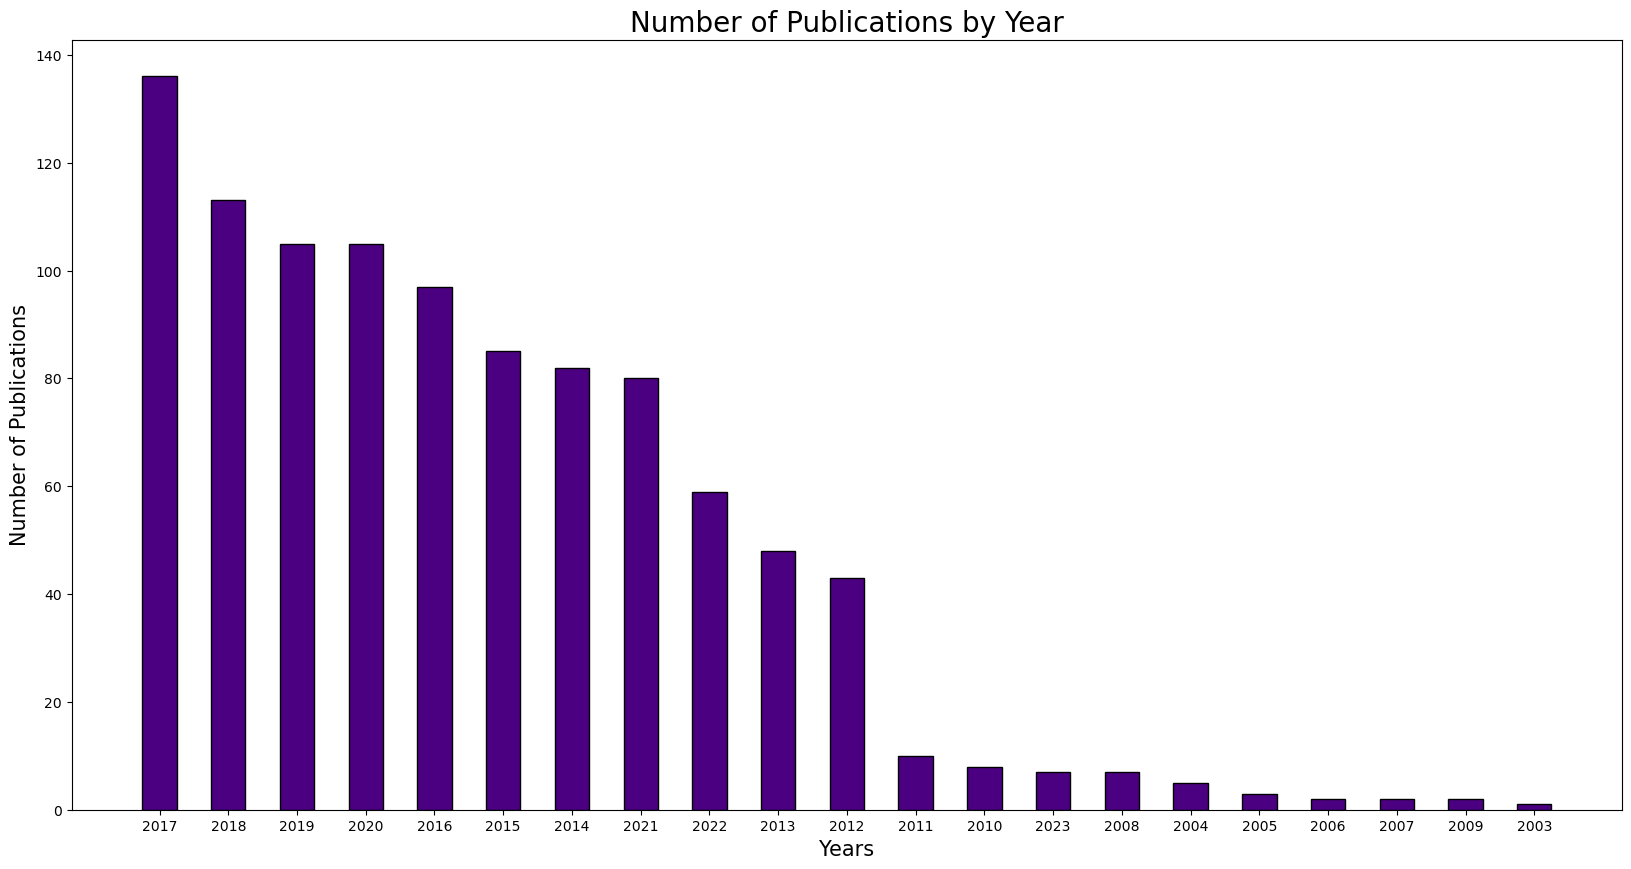

In [70]:
plt.figure(figsize=(20,10))
plt.title('Number of Publications by Year', fontsize=20)
plt.ylabel('Number of Publications', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.bar(years['Year'], years['Fics_Published'], width = 0.5, color = 'indigo', edgecolor = "black")
plt.show()

Most of the most popular fics were written in 2017, a very good year for the Potterhead fanfic community. And let's not forget that by then, the books had been finnished for 10 years and the movies for 6.
But we still have some as old as 2003, 4 years before the last book was published, making you wonder how different, cannon-wise, those fics are from the ones written after the writers had all the information.

The top 4 is closed by year 2020, the year the pandemic hit, and with people at home, hobbies like writting and reading fanfics seems to have had a greater space in people's lives, as those works, along with the ones from 2021 and 2022, had less time to archive all the kudos they did.

It's not surprising that older fics are the most liked (recieved more kudos), since some of them get so popular they become almost cannon for the fandom.

In [26]:
ships = fics['Ship'].value_counts().to_frame().reset_index()
ships.rename(columns={'index':'Ship', 'Ship':'Apperances'}, inplace=True)
ship = ships.head()
ship

,Ship,Apperances
0,Draco Malfoy/Harry Potter,386
1,Hermione Granger/Draco Malfoy,86
2,Sirius Black/Remus Lupin,65
3,Harry Potter/Tom Riddle,63
4,Harry Potter/Severus Snape,29


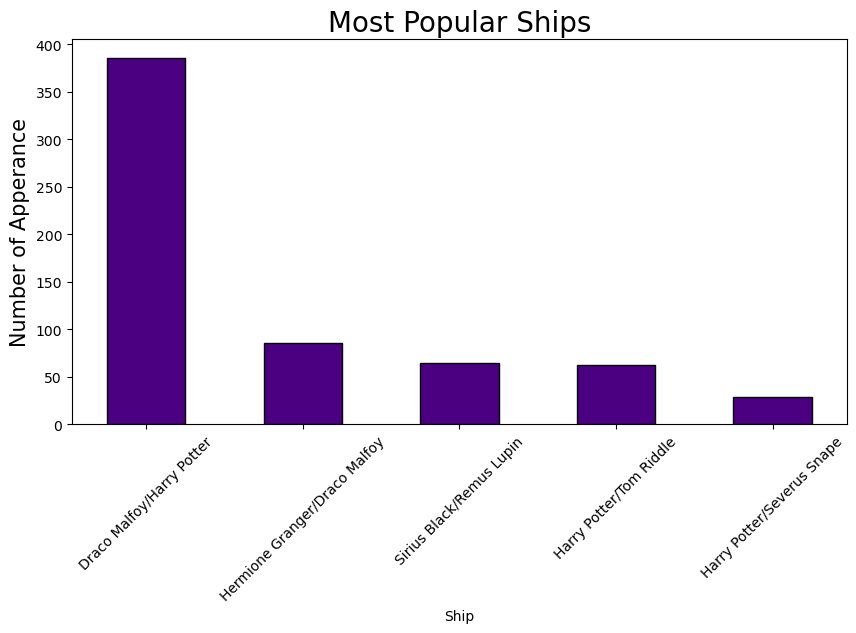

In [69]:
plt.figure(figsize=(10,5))
plt.title('Most Popular Ships', fontsize=20)
plt.ylabel('Number of Apperance', fontsize=15)
plt.xlabel('Ship', fontsize=10)
plt.xticks(size = 10, rotation = 45)
plt.bar(ship['Ship'], ship['Apperances'], width = 0.5, color = 'indigo', edgecolor = "black")
plt.show()

The top 5 most popular ships are non cannon. None of it.
And if we check the top 2, Harry Potter, the main characther, isn't even the most popular paired character, Draco Malfoy, the antagonist winning this one.
This goes to say how much people disagree with J.K Rowling's pairing ideas. If you know anything about the Harry Potter fandom, you know that when the last book hit the stores and people learned about the characters pairings in the end, you know that mostly people thought they made no sense. And since fanfiction is where people go to fix what they think is wrong with cannon, they basically ignore canon relationships in it. 

In [44]:
ship_category = fics['Ship_category'].value_counts().to_frame().reset_index()
ship_category.rename(columns={'index':'Ship_category', 'Ship_category':'Apperances'}, inplace=True)
sc = ship_category[:5]
sc

,Ship_category,Apperances
0,M/M,618
1,F/M,169
2,Gen,149
3,F/F,35
4,No category,18


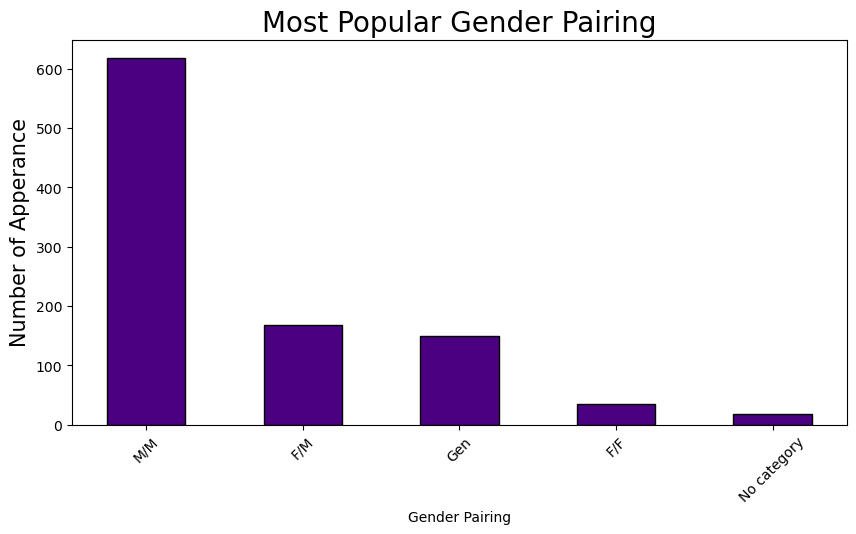

In [68]:
plt.figure(figsize=(10,5))
plt.title('Most Popular Gender Pairing', fontsize=20)
plt.ylabel('Number of Apperance', fontsize=15)
plt.xlabel('Gender Pairing', fontsize=10)
plt.xticks(size = 10, rotation = 45)
plt.bar(sc['Ship_category'], sc['Apperances'], width = 0.5, color = 'indigo', edgecolor = "black")
plt.show()

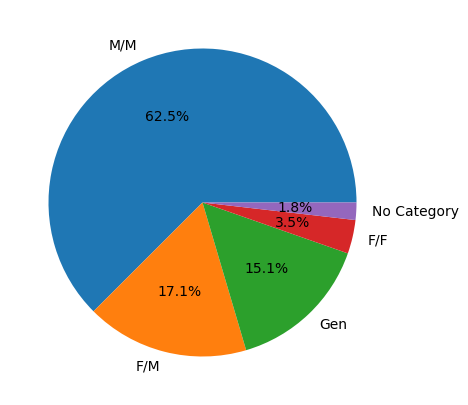

In [60]:
y=sc['Apperances']
label = ['M/M', 'F/M', 'Gen', 'F/F', 'No Category']

plt.figure(figsize=(10,5))
plt.pie(y, labels = label, autopct='%1.1f%%')
plt.show()

And now, the most popular gender pairings. From the way the most popular ships looked, there's no surprise on this one.
Even though there's only one cannonicaly gay character in the Harry Potter saga (and this information was only added after the series were over), male/male is the most common pairing in fics. 

Why is that? Well, according to Sirpa Leppänen's paper "Cybergirls in Trouble? Fan Fiction as a Discursive Space for Interrogating Gender and Sexuality", this is only a way to interrogate and play with gender in a safe space.

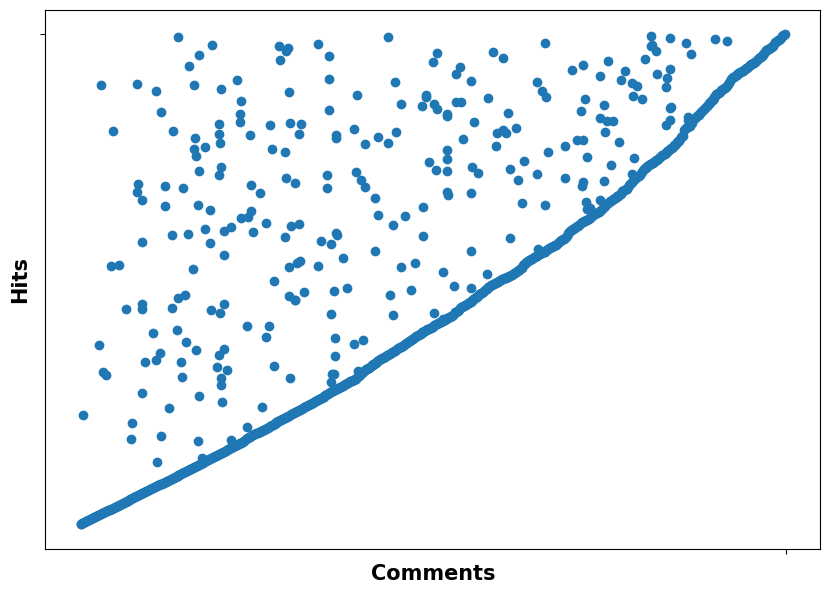

In [67]:
# Correlation between number of hits (how many times people read the work) and comments

plt.figure(figsize=(10,7))
plt.scatter(x= 'Comments', y= 'Hits', data= fics)
plt.xlabel('Comments', fontsize=15, fontweight='bold') 
plt.ylabel('Hits', fontsize=15, fontweight='bold') 
plt.xticks('')
plt.yticks('')
plt.show()

Shocking absolutely no one, we have a very strong correlation between Hits and Comments.

Since comments are not restricted, meaning people can comment as much as they want, we expect people who go back to re-read their favorite works, to comment again, creating this strong correlation.

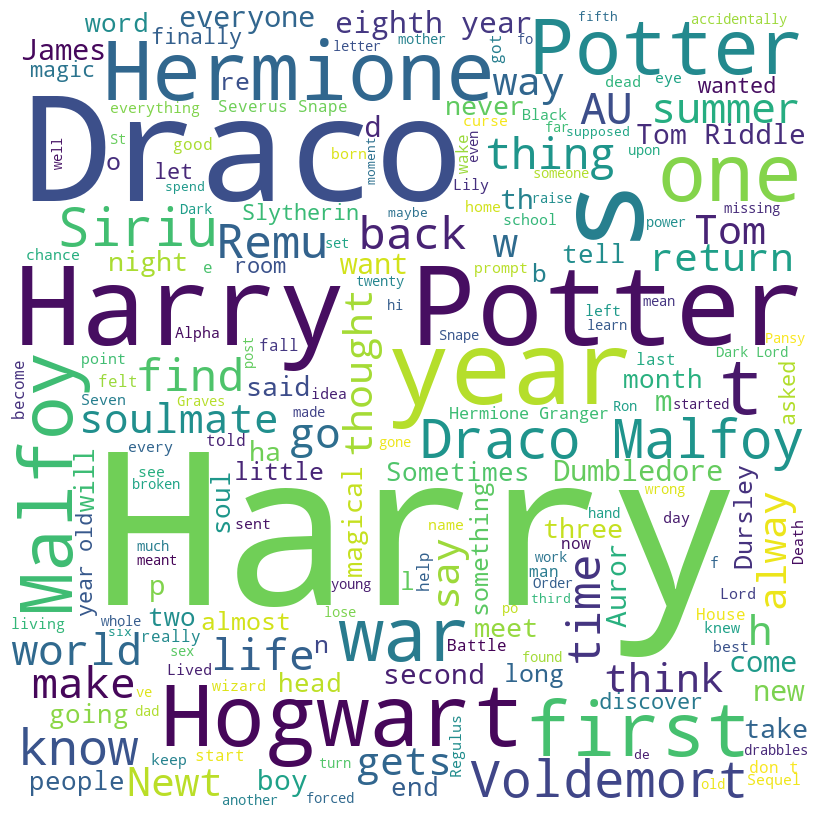

In [34]:
# Word cloud including Harry Potter, Draco Malfoy and Hermione Granger

summary_words = fics['Summary'].to_string()
stopwords = set(STOPWORDS)

for val in fics['Summary'].to_string():
    val = str(val)
    tokens = val.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

summary_words += ' '.join(tokens) + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(summary_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [35]:
# Which language is used for most of the work?
language = fics['Language'].value_counts()
language

English    1000
Name: Language, dtype: int64

All works were writen in English, which is not surprising. 

English is considered the international language, so writing your work in the language gives you more chance to be read.